In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [5]:
df = pd.read_csv(r"A:\Graduation_project\cardio_train.csv", sep = ";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### Feature Engineering

In [9]:
df.drop(columns= ["id"], inplace= True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

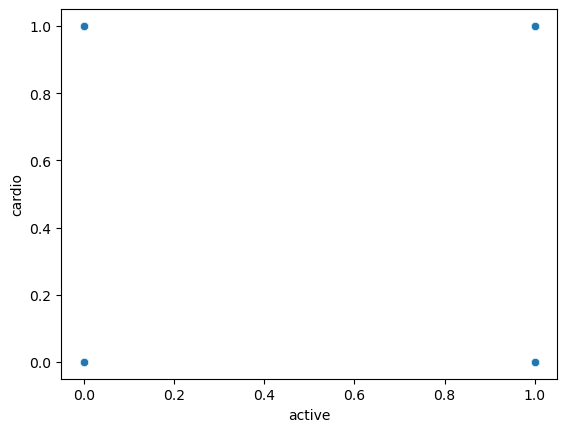

In [11]:
sns.scatterplot(data= df , x = df["active"] , y = df["cardio"])
plt.show()

<Axes: xlabel='active', ylabel='cardio'>

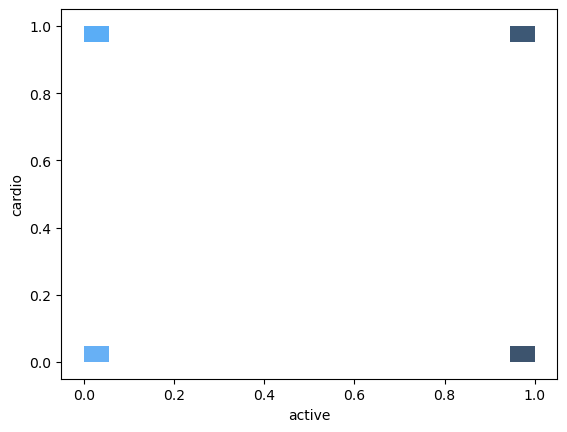

In [12]:
sns.histplot(data= df , x = df["active"] , y = df["cardio"])

In [13]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
df['age'].unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926])

In [15]:
# Convert The Age From Days To Tears 

df['age_years'] = (df['age'] / 365).astype(int)

In [16]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [17]:
# Drop The Old Column Of Age 

df.drop (columns= ["age"] , inplace= True)

In [18]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,1,163,72.0,135,80,1,2,0,0,0,1,61


In [ ]:
# This Is The Condition To Handle The Case 

condition = (df["ap_lo"] < 40) | (df["ap_lo"] > 200) | \
            (df["ap_hi"] < 80) | (df["ap_hi"] > 250)

df.drop(df[condition].index, inplace=True)


In [20]:
df['ap_lo'].unique()

array([ 80,  90,  70, 100,  60,  85,  89, 110,  65,  63,  79, 120,  50,
       109,  84, 150,  91,  40,  73,  78,  75,  86,  87,  82,  95,  69,
        74,  97,  81,  83, 119,  93, 105,  99,  77,  59, 140,  92, 108,
       125, 115,  68,  61, 106, 102,  94,  66,  52, 170,  76, 160,  62,
        96, 130, 113,  67,  88, 112, 104,  71,  72,  98,  57, 101,  64,
        45,  58, 126, 103, 180, 121, 114,  53, 111, 118,  56, 182, 107,
        55, 190, 122, 135,  54,  49])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68758 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68758 non-null  int64  
 1   height       68758 non-null  int64  
 2   weight       68758 non-null  float64
 3   ap_hi        68758 non-null  int64  
 4   ap_lo        68758 non-null  int64  
 5   cholesterol  68758 non-null  int64  
 6   gluc         68758 non-null  int64  
 7   smoke        68758 non-null  int64  
 8   alco         68758 non-null  int64  
 9   active       68758 non-null  int64  
 10  cardio       68758 non-null  int64  
 11  age_years    68758 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


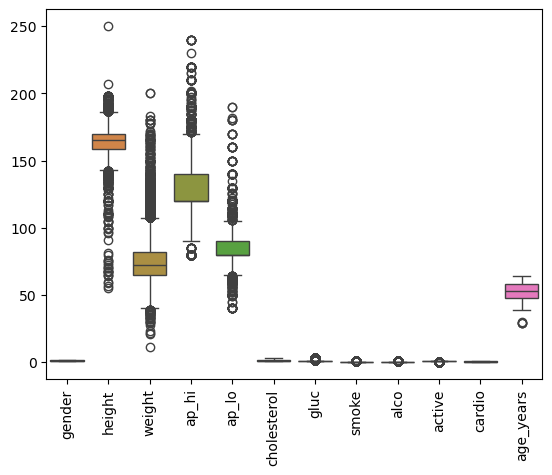

In [22]:
sns.boxplot(data= df)
plt.xticks(rotation = 90)
plt.show()

In [23]:
df[(df["ap_hi"] > 10000)  &  (df["ap_lo"] > 8000)]

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years


In [24]:
# Split Data  What it Need tO Scale 
num = ["height" , "weight", "ap_hi" , "ap_lo" , "age_years"]

In [25]:
std = StandardScaler()
df[num] = std.fit_transform(df[num])


In [26]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,0.444436,-0.846022,-0.993295,-0.142752,1,1,0,0,1,0,-0.418028
1,1,-1.021588,0.758842,0.798687,0.891966,3,1,0,0,1,1,0.320675
2,1,0.077930,-0.706469,0.201360,-1.177469,3,1,0,0,0,1,-0.270287
3,2,0.566605,0.549512,1.396015,1.926683,1,1,0,0,1,1,-0.713509
4,1,-1.021588,-1.264683,-1.590623,-2.212187,1,1,0,0,0,0,-0.861250
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0.444436,0.130852,-0.395968,-0.142752,1,1,1,0,1,0,-0.122547
69996,1,-0.777250,3.619688,0.798687,0.891966,2,2,0,0,1,1,1.207118
69997,2,2.276965,2.154377,3.187998,0.891966,3,1,0,1,0,1,-0.122547
69998,1,-0.166407,-0.148255,0.500024,-0.142752,1,2,0,0,0,1,1.207118


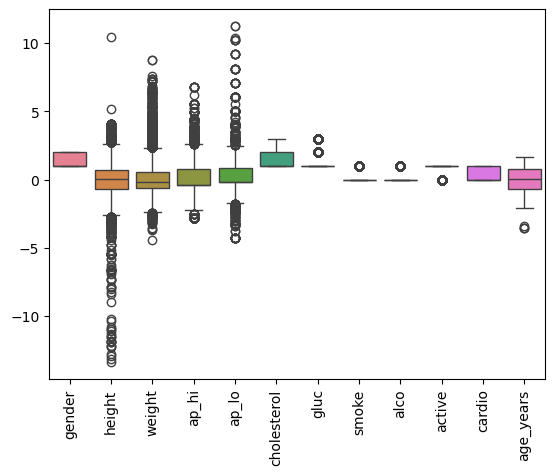

In [27]:
sns.boxplot(data= df)
plt.xticks(rotation = 90)
plt.show()

In [29]:
# Split Data 

target = df['cardio']
features = df.drop(columns=['cardio'])

In [32]:
# Check Balance 

target.value_counts()

cardio
0    34722
1    34036
Name: count, dtype: int64

In [33]:
x_train , x_test , y_train , y_test = train_test_split (features , target , stratify= target , random_state= 41 , test_size= 0.2)

In [ ]:
x_train.shape     # Feature 

(55006, 11)

In [ ]:
y_test.shape    # Target

(13752,)